What is your expected net earnings after going to UCCS for a computer science degree or to CU Boulder for a computer science degree? Taking into account acceptance rate, financial situation (housing cost)

Description: I need to assume that the person going into college has no scholarships, and that I graduate by default. I will be combining the variables housing expenses, starting salary, and acceptance rates to complete my simulation. The acceptance rate of UCCS is 97%, while the acceptance rate of CU Boulder is 83.3%. a CS degree is 4 years.

Expected Net Earnings Comparison:
   University  Acceptance Rate  Total 4-Year Cost  Expected Starting Salary  \
0        UCCS             0.93              84000                     65000   
1  CU Boulder             0.84             116000                     78000   

   Salary Standard Deviation  Expected Net Earnings (First Year)  \
0                       8000                            -17670.0   
1                      10000                            -31920.0   

   Earnings Std Dev  
0            7440.0  
1            8400.0  


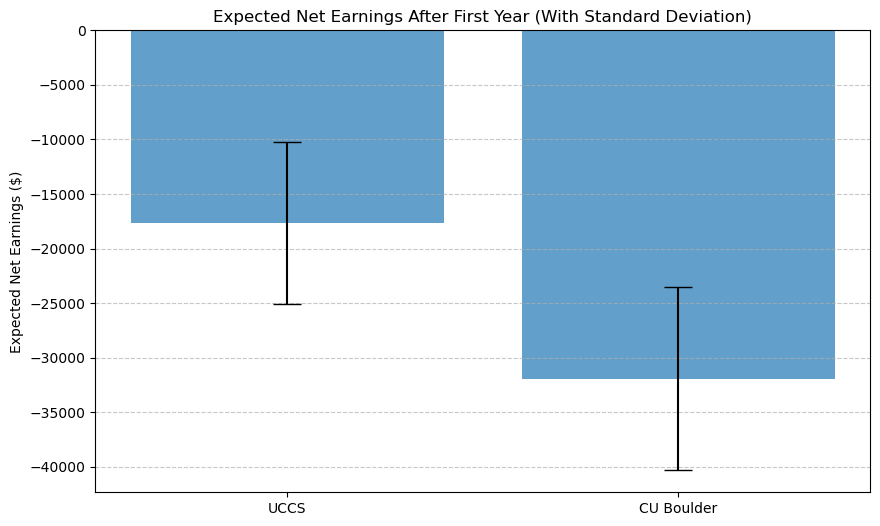

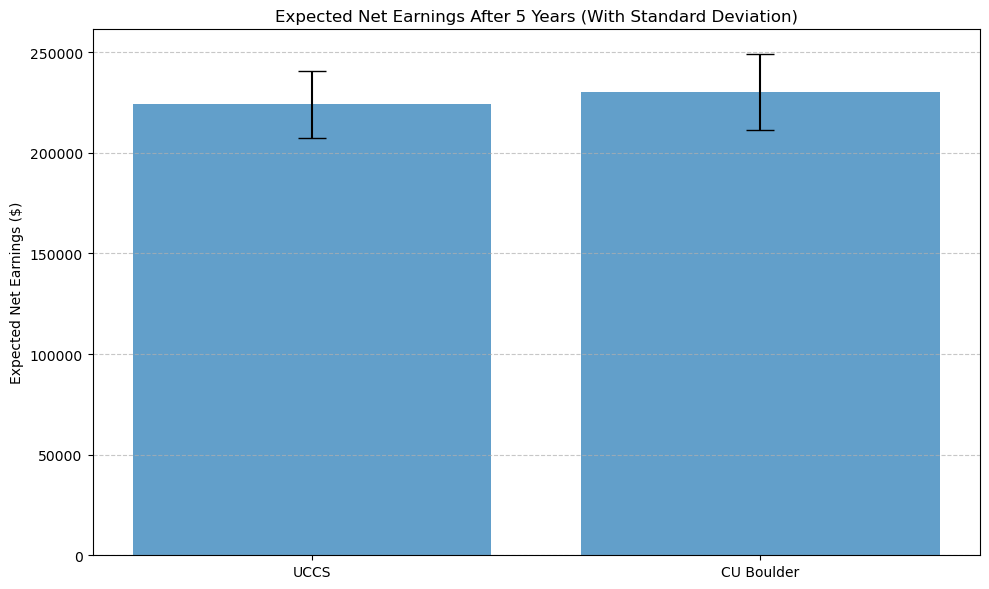

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define constants for the analysis
YEARS_TO_GRADUATE = 4  # Standard 4-year degree

# Tuition costs (annual)
UCCS_TUITION_ANNUAL = 11000  # In-state tuition approximate
CU_BOULDER_TUITION_ANNUAL = 15000  # In-state tuition approximate

# Housing costs (annual)
UCCS_HOUSING_ANNUAL = 10000  # Room and board approximate
CU_BOULDER_HOUSING_ANNUAL = 14000  # Room and board approximate

# Acceptance rates
UCCS_ACCEPTANCE_RATE = 0.93  # 93% acceptance rate
CU_BOULDER_ACCEPTANCE_RATE = 0.84  # 84% acceptance rate

# Salaries for CS graduates with standard deviation
UCCS_STARTING_SALARY = 65000  # Approximate starting salary
UCCS_SALARY_STD = 8000  # Standard deviation for UCCS salaries

CU_BOULDER_STARTING_SALARY = 78000  # Approximate starting salary
CU_BOULDER_SALARY_STD = 10000  # Standard deviation for CU Boulder salaries

# Calculate total costs
uccs_total_cost = YEARS_TO_GRADUATE * (UCCS_TUITION_ANNUAL + UCCS_HOUSING_ANNUAL)
cu_boulder_total_cost = YEARS_TO_GRADUATE * (CU_BOULDER_TUITION_ANNUAL + CU_BOULDER_HOUSING_ANNUAL)

# Expected value calculation (considering acceptance rates)
uccs_expected_earnings = UCCS_ACCEPTANCE_RATE * (UCCS_STARTING_SALARY - uccs_total_cost)
cu_boulder_expected_earnings = CU_BOULDER_ACCEPTANCE_RATE * (CU_BOULDER_STARTING_SALARY - cu_boulder_total_cost)

# Calculate standard deviation for expected earnings
uccs_earnings_std = UCCS_ACCEPTANCE_RATE * UCCS_SALARY_STD
cu_boulder_earnings_std = CU_BOULDER_ACCEPTANCE_RATE * CU_BOULDER_SALARY_STD

# Create a DataFrame to display results
results = pd.DataFrame({
    'University': ['UCCS', 'CU Boulder'],
    'Acceptance Rate': [UCCS_ACCEPTANCE_RATE, CU_BOULDER_ACCEPTANCE_RATE],
    'Total 4-Year Cost': [uccs_total_cost, cu_boulder_total_cost],
    'Expected Starting Salary': [UCCS_STARTING_SALARY, CU_BOULDER_STARTING_SALARY],
    'Salary Standard Deviation': [UCCS_SALARY_STD, CU_BOULDER_SALARY_STD],
    'Expected Net Earnings (First Year)': [uccs_expected_earnings, cu_boulder_expected_earnings],
    'Earnings Std Dev': [uccs_earnings_std, cu_boulder_earnings_std]
})

# Display results
print("Expected Net Earnings Comparison:")
print(results)

# Visualize the comparison with error bars
plt.figure(figsize=(10, 6))
universities = ['UCCS', 'CU Boulder']
earnings = [uccs_expected_earnings, cu_boulder_expected_earnings]
errors = [uccs_earnings_std, cu_boulder_earnings_std]

plt.bar(universities, earnings, yerr=errors, capsize=10, alpha=0.7)
plt.title('Expected Net Earnings After First Year (With Standard Deviation)')
plt.ylabel('Expected Net Earnings ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add 5-year projection with standard deviation
years = 5
uccs_five_year = UCCS_ACCEPTANCE_RATE * ((UCCS_STARTING_SALARY * years) - uccs_total_cost)
cu_boulder_five_year = CU_BOULDER_ACCEPTANCE_RATE * ((CU_BOULDER_STARTING_SALARY * years) - cu_boulder_total_cost)

# Standard deviation increases with time
uccs_five_year_std = UCCS_ACCEPTANCE_RATE * UCCS_SALARY_STD * np.sqrt(years)
cu_boulder_five_year_std = CU_BOULDER_ACCEPTANCE_RATE * CU_BOULDER_SALARY_STD * np.sqrt(years)

plt.figure(figsize=(10, 6))
five_year_earnings = [uccs_five_year, cu_boulder_five_year]
five_year_errors = [uccs_five_year_std, cu_boulder_five_year_std]

plt.bar(universities, five_year_earnings, yerr=five_year_errors, capsize=10, alpha=0.7)
plt.title(f'Expected Net Earnings After {years} Years (With Standard Deviation)')
plt.ylabel('Expected Net Earnings ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Analysis: UCCS has a total estimated 4-year cost of $84,000, while CU Boulder’s total cost is $116,000, making CU Boulder roughly $32,000 more expensive overall. Overall, UCCS provides a more cost-effective option in the short term, with smaller expected losses and more consistent outcomes. CU Boulder, on the other hand, has higher potential long-term financial rewards but at a greater upfront cost and lower acceptance rate.